# Vote Data Analysis from 2002 Irish General Election e-voting trial

In [1]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

%matplotlib inline

#input file
constituency="DublinWest2002_9P8_Allgenerated"
#constituency="DublinNorth2002_12P7_Allgenerated"
#constituency="Meath2002_14P7_Allgenerated"
my_csv='../data/processed/'+constituency+'.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, na_values=["Missing"], header=[0])

#set column names as first line

#df.head()
print("Print Data Frame (df.head)")
print(df.head(10))
print("Print Column names")
print(df.columns)

#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

Print Data Frame (df.head)
   Unnamed: 0   GP   LB   FF   SP  FF.1   SF   PD   NP   FG
0           0  1.0  2.0  3.0  4.0   5.0  6.0  7.0  8.0  NaN
1           1  1.0  2.0  3.0  4.0   5.0  6.0  7.0  NaN  8.0
2           2  1.0  2.0  3.0  4.0   5.0  6.0  8.0  7.0  NaN
3           3  1.0  2.0  3.0  4.0   5.0  6.0  NaN  7.0  8.0
4           4  1.0  2.0  3.0  4.0   5.0  6.0  8.0  NaN  7.0
5           5  1.0  2.0  3.0  4.0   5.0  6.0  NaN  8.0  7.0
6           6  1.0  2.0  3.0  4.0   5.0  7.0  6.0  8.0  NaN
7           7  1.0  2.0  3.0  4.0   5.0  7.0  6.0  NaN  8.0
8           8  1.0  2.0  3.0  4.0   5.0  8.0  6.0  7.0  NaN
9           9  1.0  2.0  3.0  4.0   5.0  NaN  6.0  7.0  8.0
Print Column names
Index(['Unnamed: 0', 'GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG'], dtype='object')


# Election Dataset Describe and Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362880 entries, 1 to 362880
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   GP      322560 non-null  float64
 1   LB      322560 non-null  float64
 2   FF      322560 non-null  float64
 3   SP      322560 non-null  float64
 4   FF.1    322560 non-null  float64
 5   SF      322560 non-null  float64
 6   PD      322560 non-null  float64
 7   NP      322560 non-null  float64
 8   FG      322560 non-null  float64
dtypes: float64(9)
memory usage: 24.9 MB


In [3]:
df.describe()

,GP,LB,FF,SP,FF.1,SF,PD,NP,FG
count,322560.000000,322560.000000,322560.000000,322560.000000,322560.000000,322560.000000,322560.000000,322560.000000,322560.000000
mean,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000
std,2.291291,2.291291,2.291291,2.291291,2.291291,2.291291,2.291291,2.291291,2.291291
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000,2.750000
50%,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000
75%,6.250000,6.250000,6.250000,6.250000,6.250000,6.250000,6.250000,6.250000,6.250000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


# Statistics on election - candidates and votes

In [4]:
#Stats No. of Candidates(columns) and Votes(rows), all combinations of candidates = candidates!
print("Statistics on Dataframe")
candidates = len(df.columns)
print("No. of Candidates = ", candidates)
votes = len(df.index)
print("No. of Votes = ", votes)
print("No. of all possible Combinations (candidates)! = ", math.factorial(candidates))

Statistics on Dataframe
No. of Candidates =  9
No. of Votes =  362880
No. of all possible Combinations (candidates)! =  362880


## Additional Statistics on Actual Vote Data

In [5]:
import statistics as stats
df.head()
#print(df.describe())
df.max()
# find the maximum values of each row (the highest vote preference cast)
maxValues = df.max(axis = 1)
#print(maxValues)
#mean - average 
print(f"Average(Mean) value = {stats.mean(maxValues)}")
#mode - most frequent occuring value
print(f"Mode(most often number of votes cast = {stats.mode(maxValues)}")
#median - middle value
print(f"Middle value of votes cast = {stats.median(maxValues)}")


Average(Mean) value = 8.0
Mode(most often number of votes cast = 8.0
Middle value of votes cast = 8.0


## Calculate maximum values (number of preferences) for each vote(row)

In [6]:
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)
df.shape

(362880, 10)

In [7]:
mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(mval.values)
print(mval.index)

[362880]
Float64Index([8.0], dtype='float64')


# Plot Histogram of the number of transfers a voter casts

Float64Index([8.0], dtype='float64')
[362880]
[0]


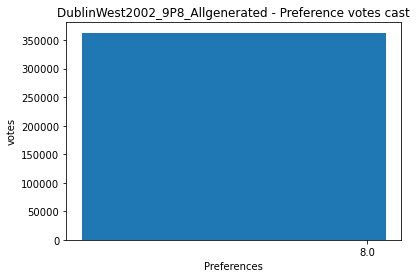

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#counts = Counter(word_list)
#labels, values = zip(*counts.items())
# sort your values in descending order
#indSort = np.argsort(values)[::-1]

# rearrange your data
labels=mval.index
values=mval.values
indexes = np.arange(len(labels))
print(labels)
print(values)
print(indexes)

bar_width = 0.35

# Add title and axis names
plt.title(constituency+' - Preference votes cast')
plt.xlabel('Preferences')
plt.ylabel('votes')

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)


# Save the histogram
plt.savefig('../images/'+constituency+'hist.png')

#show histogram
plt.show()

###Pie Chart of how many preferences a voter uses

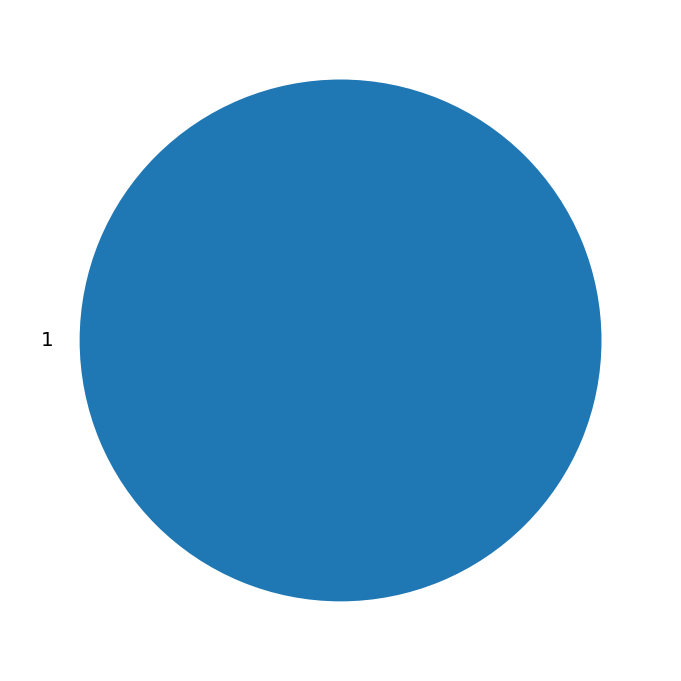

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# Set the figure size - handy for larger output
#from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

pieLabels=[]
for lab in indexes:
    pieLabels.append(lab+1)

plt.pie(values, labels = pieLabels)

# Save the Pie
plt.savefig('../images/'+constituency+'_pref_cast_pie.png')

plt.show()

In [10]:
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
print(nPrList)

[9, 72, 504, 3024, 15120, 60480, 181440, 362880, 362880]


## Print number of preferences cast, and calculate percentage

In [11]:
# creating the dataframe from dictionary
d={"Pref": labels, "Votes": values}    
dfpref = pd.DataFrame(d)

#calculate percentage of preferences cast and add to dataframe
votz = dfpref.Votes.sum()  
dfpref['Percentage'] = round(((dfpref['Votes']/votz)*100), 1)


In [12]:
print(candidates, votz)
print(df.columns)
print(dfpref)

9 362880
Index(['GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG', 'maxValues'], dtype='object')
   Pref   Votes  Percentage
0   8.0  362880       100.0


In [13]:
print(candidates, 7)

9 7


In [14]:
#calculate possible nPr = n!/(n-r)! values for each preference vote
# candidates = n. No. of pref = r
#nPrList =[]
#for i in range(1,candidates+1):
#    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
#add nPr to dataframe    
dfpref['nPr'] = int(math.factorial(candidates)/(math.factorial(candidates-7)))

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr
0,8.0,362880,100.0,181440


# Calculate number of duplicated vote sequences

In [15]:
#print((~df.duplicated()).sum())
#print(df.duplicated(keep='last').value_counts())

In [16]:
#drop all dublicate rows keeping last one
df.drop_duplicates(keep='last', inplace=True, subset=df.columns.difference(['maxValues']))

In [17]:
#print the number of votes, and the number of unique votes
print(f"Number of votes {votes}")
print(f"Number of unique vote patterns (after removing duplicates) {len(df)}")

Number of votes 362880
Number of unique vote patterns (after removing duplicates) 362880


In [18]:
# after removal of duplicates
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(dfpref)

   Pref   Votes  Percentage     nPr
0   8.0  362880       100.0  181440


### calculate unique vote combinations for each preference cast 

In [19]:
#calculate unique vote combinations for each preference cast 
dfpref['Unique Votes'] = mval.values

dfpref['Percentage Used'] = round(((dfpref['Unique Votes']/dfpref['nPr'])*100), 5)

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used
0,8.0,362880,100.0,181440,362880,200.0


In [20]:
#just checking 
print(sum(mval.values))
nPr=dfpref['nPr']

362880


## Import in Political Compass data for Irish Parties

In [21]:
#download compass data positioning irish political parties on the political spectrum
pcData='../data/pc.csv'

#set column names
col_names = ['party', 'xaxis', 'yaxis']
#read in political compass data
dfPC = pd.read_csv(pcData, na_values=["Missing"], names=col_names)
print("Irish Parties on Political Compass")
print(dfPC)
points=[]
points = dfPC.party
x=[] #x-axis coordinates
y=[] #y-axis coordinates
pt=[]

#populate two lists with the x and y - coordinates
for p in points:
    pt.append(dfPC.party)
    x.append(dfPC.xaxis)
    y.append(dfPC.yaxis)

Irish Parties on Political Compass
  party  xaxis  yaxis
0    SP   -7.0   -2.5
1    SF   -4.5    1.0
2    GP   -1.0   -2.0
3    NP    0.0    0.0
4    LB    1.5   -0.5
5    FF    2.5    2.4
6    FG    3.5    2.5
7    PD    4.0    3.0


In [22]:
# get the party initials (1 characters) from the column names i.e. remove .1 .2 L Retc
#print(df.columns)
partiesList= list(df.columns)
del partiesList[-1]
print(partiesList)
partiesList2=[]
for pl in partiesList:
    #print(pl[:2] )
    partiesList2.append(pl[:2])
print(partiesList2)

['GP', 'LB', 'FF', 'SP', 'FF.1', 'SF', 'PD', 'NP', 'FG']
['GP', 'LB', 'FF', 'SP', 'FF', 'SF', 'PD', 'NP', 'FG']


In [23]:
def getEuclidVoteDetails(voteRow, dfPC):
    #populate 3 lists with text, x co-ord and y co-ord
    partyPCList = dfPC.party.tolist()
   # print("partyList",partyPCList)
    xi=[]
    yi=[]
    pp=[]
    for d in voteRow:
        inx=partyPCList.index(d)
        pp.append(dfPC.iloc[inx].tolist()[0])
        xi.append(dfPC.iloc[inx].tolist()[1])
        yi.append(dfPC.iloc[inx].tolist()[2])

   # for ip in range(len(pp)):
   #     print(f"{ip+1} - {pp[ip]} ({xi[ip]}, {yi[ip]})")

    #Calculate the eculidean distance a vote travels on the political spectrum
    dist = 0
    total_dist=0
    for pl in range(len(pp)):
    # initializing points in # numpy arrays      
        if pl != (len(pp)-1):
            point1 = np.array((xi[pl],yi[pl]))
            point2 = np.array((xi[pl+1],yi[pl+1]))

    #calculating Euclidean distance # using linalg.norm()
            dist = np.linalg.norm(point1 - point2)
            #print(f"Euclidean distance between vote {pl+1} and {pl+2} is {dist}")
            total_dist = total_dist + dist
 #   print(total_dist, len(pp))
    if len(pp) > 1:
        avg_dist = total_dist/(len(pp)-1)    
    else:
        avg_dist = total_dist
    #print("Total Distance Travelled on Political Compass as a vote transfers ", total_dist)
    #print("Average Distance Travelled on Political Compass of each vote transfers ", avg_dist)

    return(total_dist, avg_dist)

In [24]:
def getVotesParty(voterow, partieslegend):
    #convert a vote row into parties initials
    voteP=[]
    for v in range(len(voterow)):
        for w in range(len(voterow)):
            if voterow[w] == v+1:
                voteP.append(partieslegend[w])
    return(voteP)

In [25]:
#calculate the euclidean distance for all rows
EuclidDist = []
AvgEucDist =[]
for dft5 in range(len(df)):
    #print(dft5)
    dftR = list(df.iloc[dft5])
    del dftR[-1]
    #print("Call get Votes for Party in row")
    votePList=getVotesParty(dftR, partiesList2)
    #print(votePList)
    (tD, aD) = getEuclidVoteDetails(votePList, dfPC)
    #print(tD, aD)
    EuclidDist.append(tD)
    AvgEucDist.append(aD)
    
#print(EuclidDist)
#print(AvgEucDist)
#print(type(EuclidDist))
df['Euclid Dist'] = np.array(EuclidDist)
df['Avg. Euc. Dist'] = np.array(AvgEucDist)
display(df.tail(10))


,GP,LB,FF,SP,FF.1,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist
362871,8.0,7.0,6.0,NaN,5.0,4.0,3.0,2.0,1.0,8.0,31.154963,4.450709
362872,NaN,7.0,6.0,8.0,5.0,4.0,3.0,2.0,1.0,8.0,36.971611,5.281659
362873,8.0,NaN,6.0,7.0,5.0,4.0,3.0,2.0,1.0,8.0,41.881959,5.983137
362874,NaN,8.0,6.0,7.0,5.0,4.0,3.0,2.0,1.0,8.0,44.593286,6.370469
362875,7.0,8.0,NaN,6.0,5.0,4.0,3.0,2.0,1.0,8.0,44.797435,6.399634
362876,7.0,NaN,8.0,6.0,5.0,4.0,3.0,2.0,1.0,8.0,47.504236,6.786319
362877,8.0,7.0,NaN,6.0,5.0,4.0,3.0,2.0,1.0,8.0,47.508762,6.786966
362878,NaN,7.0,8.0,6.0,5.0,4.0,3.0,2.0,1.0,8.0,47.660858,6.808694
362879,8.0,NaN,7.0,6.0,5.0,4.0,3.0,2.0,1.0,8.0,52.172686,7.453241
362880,NaN,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1.0,8.0,49.617981,7.088283


Text(0.5, 0, 'Euclid Distance')

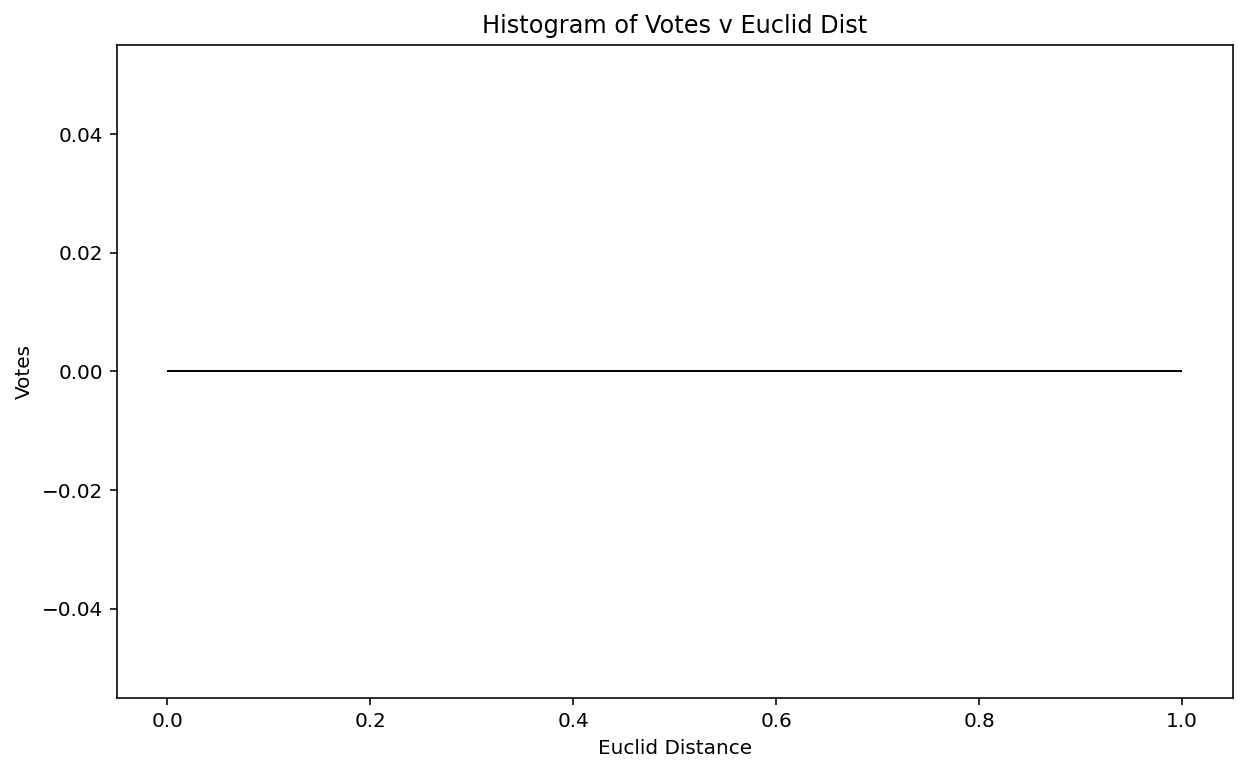

In [26]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
dfmh = pd.DataFrame()
dfmh = df.loc[df['maxValues']==5.0]

plt.hist(dfmh['Euclid Dist'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

dfh= pd.DataFrame()
dfh['maxValues'] = df['maxValues']
dfh['Euclid Dist'] = df['Euclid Dist']
dfh['Avg. Euc. Dist'] = df['Avg. Euc. Dist']

# Plot Histogram
#sns.histplot(data = dfh, x = dfh['Euclid Dist'], kde = True, hue = dfh['maxValues'])


# seaborn histogram
#sns.distplot(df['Euclid Dist'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})

#sns.histplot(data = df['Euclid Dist'])



# Add labels
plt.title('Histogram of Votes v Euclid Dist')
plt.ylabel('Votes')
plt.xlabel('Euclid Distance')

In [27]:
# calculate the avg, mean median min and max of the euclidean distance for each preference 
dfeucmean =  df.groupby('maxValues')['Euclid Dist'].mean()
dfeucmedian =  df.groupby('maxValues')['Euclid Dist'].median()
#dfeucmode =  df.groupby('maxValues')['Euclid Dist'].mode() # no mode

In [28]:
dfeucmin =  df.groupby('maxValues')['Euclid Dist'].min()
dfeucmax =  df.groupby('maxValues')['Euclid Dist'].max()

In [29]:
#convert list to numpy array since lists seem to add at row 1 not 0
dfpref['Euc Mean'] = np.array(dfeucmean)
dfpref['Euc Median'] = np.array(dfeucmedian)
dfpref['Euc Min']  = np.array(dfeucmin)
dfpref['Euc Max']  = np.array(dfeucmax)

## Display the Statistics Table of the Vote

In [30]:
# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used,Euc Mean,Euc Median,Euc Min,Euc Max
0,8.0,362880,100.0,181440,362880,200.0,36.163019,36.243927,13.206646,55.450669


### Write Statistics table to csv file

In [31]:
#filename and dir
out_csv='../data/stats/'+constituency+'_gen_statistics.csv'

#write to csv file
dfpref.to_csv(out_csv)

### write out the dataframe with generated fields, categorise sequence as regular (1)

### Bar Plot of the Percentages of Preferenes Cast v Possible Preferences

In [32]:
# Set the figure size - handy for larger output
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

#create data frame for bar chart
plotdata = pd.DataFrame([], 
    index=pieLabels
)
plotdata['Cast']=list(dfpref['Unique Votes'])
plotdata['nPr']=list(dfpref['nPr'])

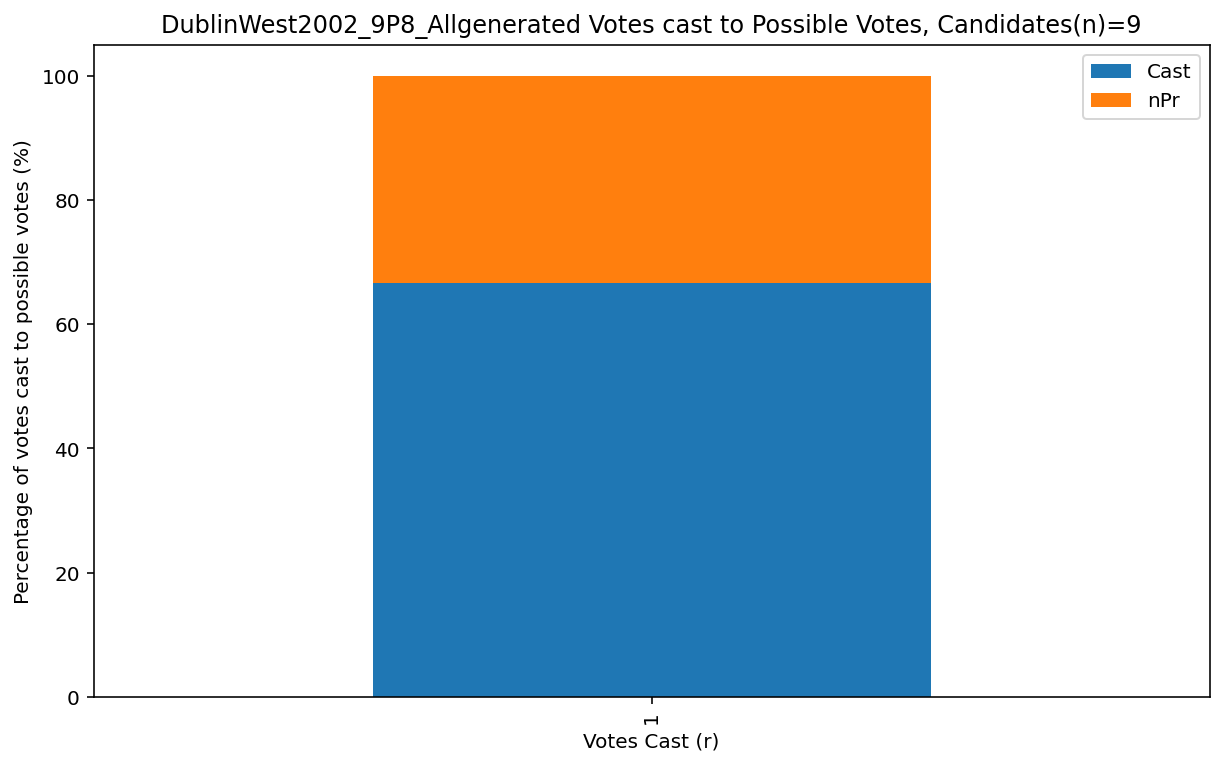

In [33]:
stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True)
plt.title(constituency + " Votes cast to Possible Votes, Candidates(n)=9")
plt.xlabel("Votes Cast (r)")
plt.ylabel("Percentage of votes cast to possible votes (%)")

# Save the bar
plt.savefig('../images/'+constituency+'_pref_percent_bar.png')
plt.show()

In [34]:
print(dfpref['Euc Max'])

0    55.450669
Name: Euc Max, dtype: float64


In [35]:
#df.loc[(df['Avg. Euc. Dist'] > 5.0) & (df['maxValues']==7.0)]

In [36]:
df=df.loc[(df['Euclid Dist'] > 55.0)] # & (df['maxValues']==8.0)]

In [37]:
df.shape

(140, 12)

In [38]:
#add column with 
df['Seq']=0

#filename and dir
out_csv='../data/processed/'+constituency+'_gen_irreg.csv'
display(df.head(10))

#write to csv file
df.to_csv(out_csv)

,GP,LB,FF,SP,FF.1,SF,PD,NP,FG,maxValues,Euclid Dist,Avg. Euc. Dist,Seq
82260,2.0,NaN,1.0,4.0,3.0,6.0,5.0,8.0,7.0,8.0,55.404873,7.914982,0
82306,2.0,NaN,1.0,4.0,3.0,6.0,7.0,8.0,5.0,8.0,55.435039,7.919291,0
82380,2.0,NaN,1.0,6.0,3.0,4.0,5.0,8.0,7.0,8.0,55.344546,7.906364,0
82426,2.0,NaN,1.0,6.0,3.0,4.0,7.0,8.0,5.0,8.0,55.450669,7.921524,0
83676,2.0,NaN,1.0,4.0,5.0,6.0,3.0,8.0,7.0,8.0,55.260166,7.894309,0
83752,2.0,NaN,1.0,4.0,7.0,6.0,3.0,8.0,5.0,8.0,55.365004,7.909286,0
83940,2.0,NaN,1.0,6.0,5.0,4.0,3.0,8.0,7.0,8.0,55.184210,7.883459,0
83986,2.0,NaN,1.0,6.0,7.0,4.0,3.0,8.0,5.0,8.0,55.349375,7.907054,0
85114,2.0,NaN,1.0,4.0,5.0,6.0,7.0,8.0,3.0,8.0,55.175940,7.882277,0
85168,2.0,NaN,1.0,4.0,7.0,6.0,5.0,8.0,3.0,8.0,55.250612,7.892945,0
